# Graphical exploratory data analysis

## Introduction to Exploratory Data Analysis


In [2]:
import pandas as pd

In [3]:
df_swing = pd.read_csv('data/2008_swing_states.csv')
df_swing[['state', 'county', 'dem_share']]

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
...,...,...,...
217,OH,Hamilton County,53.53
218,OH,Highland County,36.54
219,OH,Hocking County,49.58
220,OH,Licking County,41.97


## Ploling a histogram

### Ploling a histogram

In [4]:
import matplotlib.pyplot as plt 

_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

<Figure size 640x480 with 1 Axes>

### Seting the bins of a histogram 

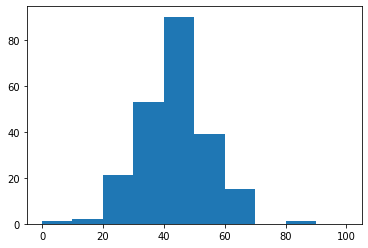

In [5]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
_ = plt.hist(df_swing['dem_share'], bins=bin_edges)
plt.show()

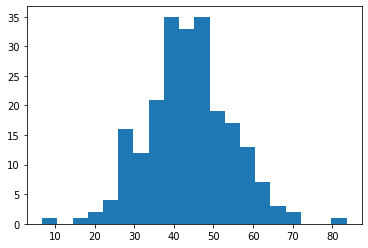

In [6]:
_ = plt.hist(df_swing['dem_share'], bins=20)
plt.show()

### Seting Seaborn styling

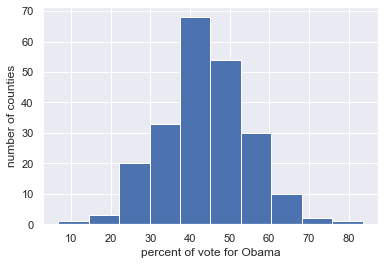

In [7]:
import seaborn as sns
# set style to be the seaborn default
sns.set()
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama') 
_ = plt.ylabel('number of counties') 
plt.show()

## Plot all of your data: Bee swarm plots

### Generating a bee swarm plot

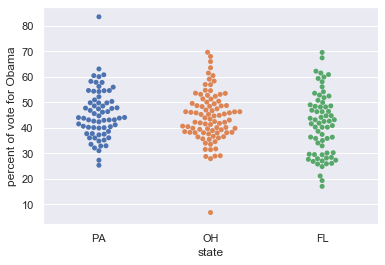

In [8]:
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

## Plot all of your data: ECDFs

### Empirical cumulative distribution function (ECDF)

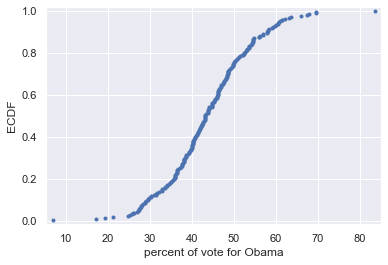

In [9]:
import numpy as np
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none') # we just want points
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges In [8]: 
plt.show()

### Exercise

####  Computing the ECDF

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [11]:
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
    4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
    4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
    4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

#### Plotting the ECDF

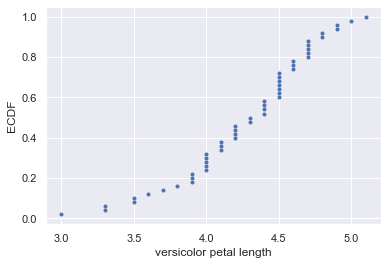

In [12]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('versicolor petal length')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

#### Comparison of ECDFs

In [13]:
setosa_petal_length = np.array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

virginica_petal_length = np.array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
    5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
    4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
    5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

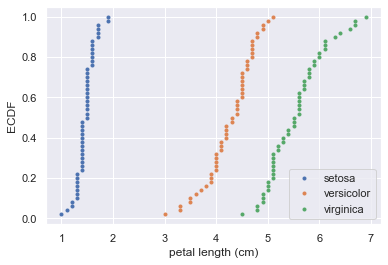

In [14]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Quantitative exploratory data analysis

## Introduction to summary statistics: The sample mean and median

### Mean vote percentage
$mean=\bar{x}=\frac{1}{n} \sum_{i=1}^n$

In [18]:
import numpy as np

np.mean(df_swing[df_swing['state']=='PA']['dem_share'])

45.476417910447765

### Outliers

Data points whose value is far greater or less than most of the rest of the data.
An outlier can significantly affect the value of the mean, but not the median.

### The median
The middle value of a data set

In [23]:
np.median(df_swing[df_swing['state']=='PA']['dem_share'])

44.03

## Percentiles, outliers, and box plots

### Computing percentiles

In [25]:
np.percentile(df_swing['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

### Generating a box plot

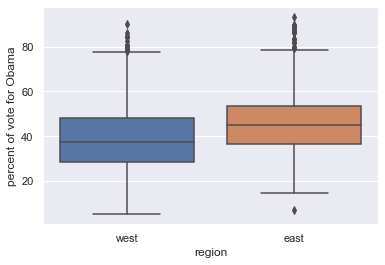

In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns

df_all_states = pd.read_csv('data/2008_all_states.csv')

_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama') 
plt.show()

### Exercise: Iris 

#### Computing percentiles

In [29]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


#### Comparing percentiles to ECDF

In [45]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Series(iris.target)

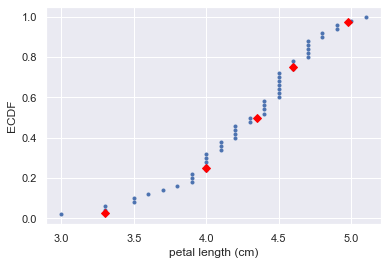

In [46]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

#### Box-and-whisker plot

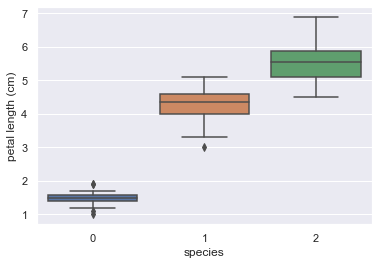

In [48]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

## Variance and standard deviation

### Variance

- The mean squared distance of the data from their mean
- Informally, a measure of the spread of data

$variance=\frac{1}{n} \sum_{i=1}^{n} (x_i- \bar{x})^2$

In [61]:
dem_share_FL = df_all_states[df_all_states['state']=='FL']['dem_share']
np.var(dem_share_FL)

147.44278618846064

In [62]:
np.std(dem_share_FL)

12.142602117687158

In [63]:
np.sqrt(np.var(dem_share_FL))

12.142602117687158

### Exercise

#### Computing the variance

In [64]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


#### The standard deviation and the variance

In [65]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


## Covariance and the Pearson correlation coefficient


### Generating a scatter plot

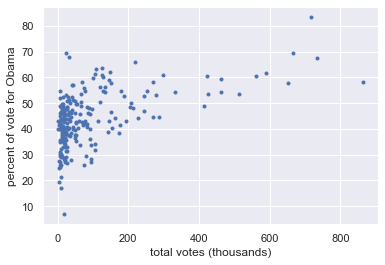

In [72]:
_ = plt.plot(df_swing['total_votes']/1000, df_swing["dem_share"], marker='.', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

# we see the 12th most populated counties all voted for Obama.

### Covariance

A measure of how two quantities vary together
$covariance=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$

### Pearson correlation coefficient

$\rho = Pearson correlation = \frac{covariance}{(std of x)(std of y)}= \frac{variability due to codependence}{independent variability}$

### Exercise

#### Scatter plots

In [79]:
versicolor_petal_width = np.array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
    1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
    1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
    1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3])

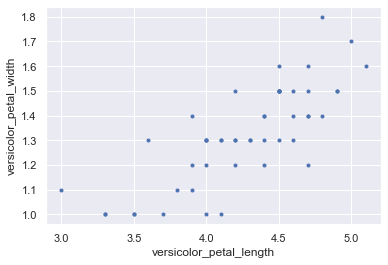

In [81]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('versicolor_petal_length')
_ = plt.ylabel('versicolor_petal_width')

# Show the result
plt.show()

#### Computing the covariance


In [82]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[1,0]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


#### Computing the Pearson correlation coefficient


In [83]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r =  pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


# Thinking probabilistically-- Discrete variables


## Random number generators and hacker statistics

### Hacker statistics

- Uses simulated repeated measurements to compute probabilities.

### The `np.random` module

- Suite of functions based on random number generation
- `np.random.random()`:
    draw a number between 0 and 1
    
### Bernoulli trial

- An experiment that has two options, "success" (True) and "failure" (False).

### Random number seed

- Integer fed into random number generating algorithm
- Manually seed random number generator if you need reproducibility
- Specified using `np.random.seed()`

Simulating 4 coin flips

In [88]:
import numpy as np
np.random.seed(42)
random_numbers = np.random.random(size=4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [89]:
heads = random_numbers < 0.5 
heads

array([ True, False, False, False])

In [87]:
np.sum(heads)

1

In [90]:
n_all_heads = 0 # Initialize number of 4-heads trials

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads / 10000

0.0619

### Hacker stats probabilities

- Determine how to simulate data
- Simulate many many times
- Probability is approximately fraction of trials with the outcome of interest

### Exercise

#### Generating random numbers using the np.random module

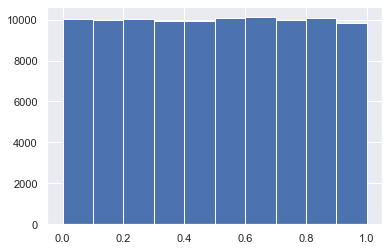

In [91]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] =  np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

# The histogram is almost exactly flat across the top, 
# indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

#### The `np.random` module and Bernoulli trials

In [92]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

#### How many defaults might we expect?

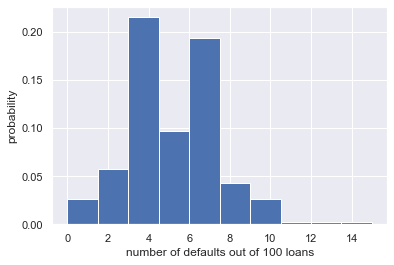

In [146]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

#### Will the bank fail?

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

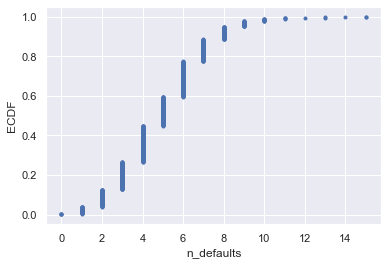

Probability of losing money = 0.022


In [94]:
# Compute ECDF: x, y
x = np.sort(n_defaults)
y = np.arange(1, len(x)+1) / len(x)
# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none') # we just want points
_ = plt.xlabel('n_defaults')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

## Probability distributions and stories: The Binomial distribution


### Probability mass function (PMF)

- The set of probabilities of discrete outcomes

### Discrete Uniform distribution: the story
- The outcome of rolling a single fair die is Discrete Uniformly distributed.

### Binomial distribution: the story

- The number r of successes in n Bernoulli trials with probability p of success, is Binomially distributed

- The number r of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed

Sampling from the Binomial distribution

In [95]:
np.random.binomial(4, 0.5) 

2

In [97]:
np.random.binomial(4, 0.5, size=10)

array([3, 1, 2, 1, 2, 2, 2, 2, 1, 3])

The Binomial PMF

In [98]:
samples = np.random.binomial(60, 0.1, size=10000)

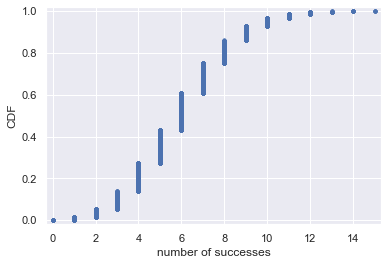

In [99]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none') 
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

### Exercise

#### Sampling out of the Binomial distribution

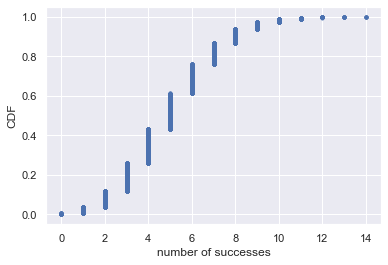

In [101]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none') 
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

#### Plotting the Binomial PMF

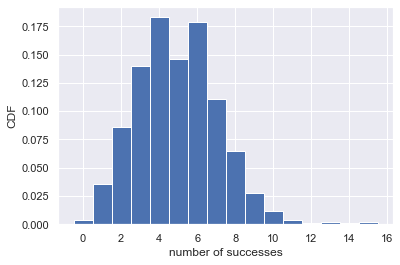

In [147]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

## Poisson processes and the Poisson distribution


### Poisson process

- The timing of the next event is completely independent of when the previous event happened

### Examples of Poisson processes

- Natural births in a given hospital
- Hit on a website during a given hour
- Meteor strikes
- Molecular collisions in a gas
- Aviation incidents
- Buses in Poissonville

### Poisson distribution

- The number r of arrivals of a Poisson process in a given time interval with average rate of λ arrivals
    per interval is Poisson distributed.
    
- The number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed.

- Limit of the Binomial distribution for low probability of success and large number of trials. That is, for rare events.

### The Poisson CDF

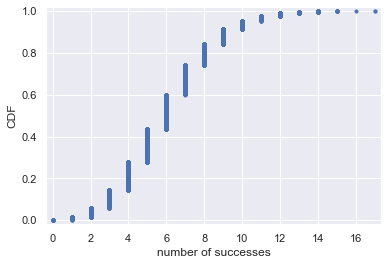

In [103]:
samples = np.random.poisson(6, size=10000)
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none') 
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

### Exercise

The Poisson distribution with arrival rate equal to $np$ approximates a Binomial distribution for $n$ Bernoulli trials with probability $p$ of success (with $n$ large and $p$ small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

In [104]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))
    
# Te means are all about the same, which can be shown to be true by doing some pen-and-paper work. 
# The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson 
# distribution as the probability p gets lower and lower.

Poisson:      9.9892 3.217309957091483
n = 20 Binom: 10.0451 2.249058912078561
n = 100 Binom: 10.0361 3.033182617317988
n = 1000 Binom: 9.9784 3.1801153186637747


Was 2015 anomalous?

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [105]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large) 

# The result is about 0.007. This means that it is not that improbable to see a 
# 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

Probability of seven or more no-hitters: 0.0076


# Thinking probabilistically-- Continuous variables

## Probability density functions

### Continuous variables

- Quantities that can take any value, not just discrete values 

### Probability density function (PDF)

- Continuous analog to the PMF
- Mathematical description of the relative likelihood of observing a value of a continuous variable

## Introduction to the Normal distribution

### Normal distribution

- Describes a continuous variable whose PDF has a single symmetric peak.


### Checking Normality of Michelson data

In [109]:
michelson_speed_of_light = pd.read_csv('data/michelson_speed_of_light.csv')
michelson_speed_of_light = michelson_speed_of_light["velocity of light in air (km/s)"]

In [112]:
import numpy as np

mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

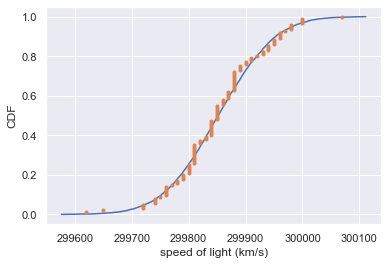

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none') 
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF') 
plt.show()

### Exercise

#### The Normal PDF

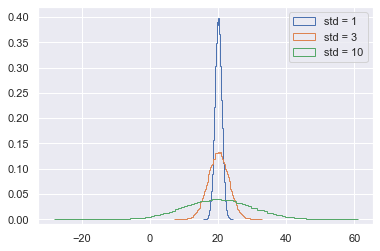

In [145]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
sns.set()
plt.hist(samples_std1, bins=100, density=True, histtype='step')
plt.hist(samples_std3, bins=100, density=True, histtype='step')
plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

#### The Normal CDF

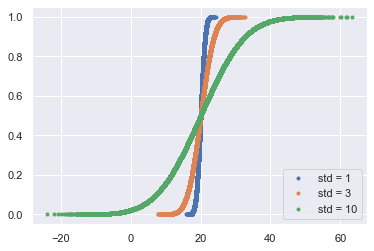

In [117]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)


# Plot CDFs
sns.set()
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none') 
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none') 
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none') 

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

## The Normal distribution: Properties and warnings


### Exercise

Are the Belmont Stakes results Normally distributed

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [134]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])


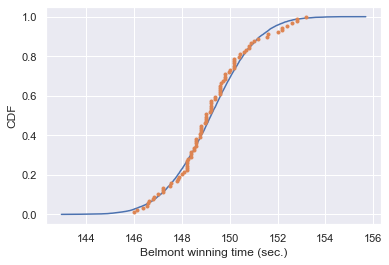

In [135]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x, y = ecdf(belmont_no_outliers)
x_theor, y_theor = ecdf(samples)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

# The theoretical CDF and the ECDF of the data suggest that 
# the winning Belmont times are, indeed, Normally distributed. 
# This also suggests that in the last 100 years or so, there have not been major 
# technological or training advances that have significantly affected the speed at which horses can run this race.

What are the chances of a horse matching or beating Secretariat's record?

In [136]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples<=144)/1000000

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.00061


## The Exponential distribution

- The waiting time between arrivals of a Poisson process is Exponentially distributed

### Possible Poisson process

- Nuclear incidents: Timing of one is independent of all others


### Exercise

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

In [138]:
# Define a function with call signature successive_poisson(tau1, tau2, size=1) that samples the waiting time for a no-hitter and a hit of the cycle.
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

Distribution of no-hitters and cycles

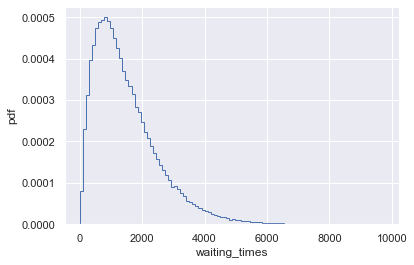

In [144]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype='step')


# Label axes
_ = plt.xlabel('waiting_times')
_ = plt.ylabel('pdf')

# Show the plot
plt.show()

# Parameter estimation by optimization

## Optimal parameters

- Parameter values that bring the model in closest agreement with the data

### Exercise

#### How often do we get no-hitters?

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

In [141]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

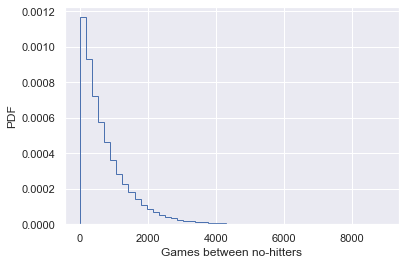

In [143]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

#### Do the data follow our story?

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

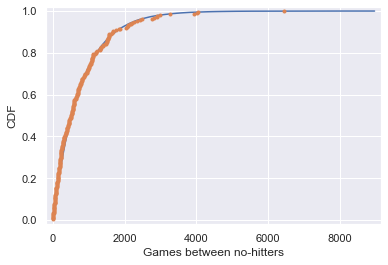

In [148]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker = '.', linestyle = 'none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

# It looks like no-hitters in the modern era of Major League Baseball 
# are Exponentially distributed. Based on the story of the Exponential distribution, 
# this suggests that they are a random process; when a no-hitter will happen is independent 
# of when the last no-hitter was.

#### How is this parameter optimal?

Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

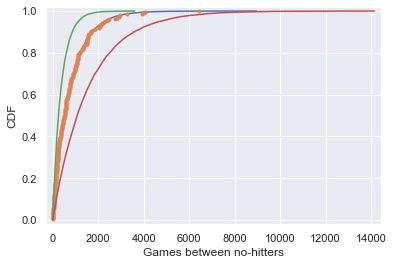

In [150]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

## Linear regression by least squares


### Least squares

- The process of finding the parameters for which the sum of the squares of the residuals is minimal

### Least squares with np.polyfit()

In [153]:
# perform least squares analysis with polynomial functions. Linear function is first degree polynomial
slope, intercept = np.polyfit(df_swing['total_votes'], df_swing["dem_share"], 1)
# return slope of best fit line
slope # we get 4 more votes for Obama for every 100000 additional voter in a county

4.037071700946557e-05

In [154]:
intercept

40.11391196864175

### Exercise

#### EDA of literacy/fertility data

In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

In [155]:
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

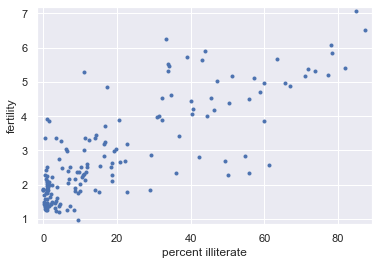

0.8041324026815341


In [156]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

# You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation 
# coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero 
# illiteracy and about 1.8 children/woman.

#### Linear regression

We will assume that fertility is a linear function of the female illiteracy rate. That is, f=ai+b, where a is the slope and b is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using `np.polyfit()`.



slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


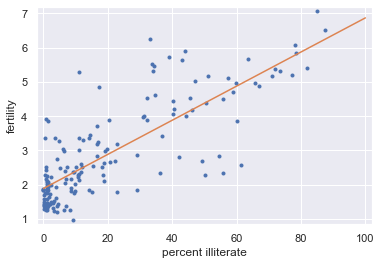

In [157]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

#### How is it optimal?   
The function `np.polyfit()` that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

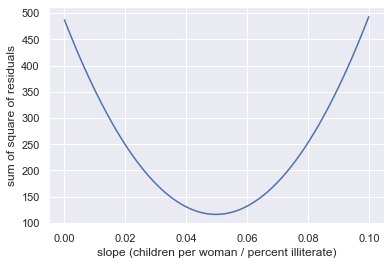

In [158]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

#  Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the 
# square of the residuals, is the same value you got when performing the regression.

## The importance of EDA: Anscombe's quartet


### Exercise

#### Linear regression on appropriate Anscombe data

In [159]:
x = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])

0.5000909090909095 3.0000909090909076


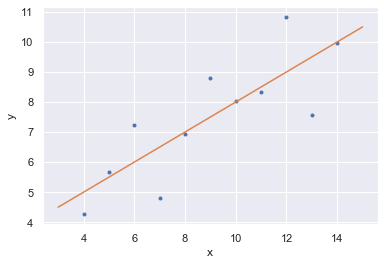

In [160]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.',  linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

#### Linear regression on all Anscombe data

Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. 

In [165]:
anscombe_x = [np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])]


In [166]:
anscombe_y = [np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]),
 np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]),
 np.array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,
         6.42,  5.73]),
 np.array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
         7.91,  6.89])]

In [167]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y ):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


## Generating bootstrap replicates


### Bootstrapping

- The use of resampled data to perform statistical inference

### Bootstrap sample

- A resampled array of the data

### Bootstrap replicate

- A statistic computed from a resampled array

### Resampling engine: np.random.choice()

In [168]:
import numpy as np 
np.random.choice([1,2,3,4,5], size=5) # the function dosent delete an entry when it samples it out of the array

array([2, 5, 2, 5, 3])

### exercise
To help you gain intuition about how bootstrapping works, imagine you have a data set that has only three points, [-1, 0, 1]. How many unique bootstrap samples can be drawn (e.g., [-1, 0, 1] and [1, 0, -1] are unique), and what is the maximum mean you can get from a bootstrap sample? It might be useful to jot down the samples on a piece of paper.

Answer: There are 27 unique samples, and the maximum mean is 1.

Visualizing bootstrap samples

In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

In [169]:
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

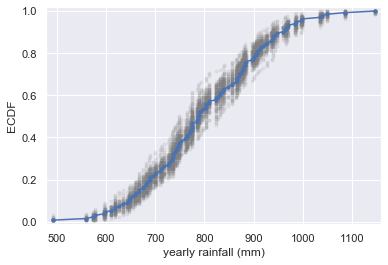

In [170]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot( x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show() #  bootstrap samples give an idea of how the distribution of rainfalls is spread.

## Bootstrap confidence intervals

### Bootstrap replicate function

In [171]:
def bootstrap_replicate_1d(data, func): 
    """Generate bootstrap replicate of 1D data.""" 
    bs_sample = np.random.choice(data, len(data)) 
    return func(bs_sample)

bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299847.7

In [172]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299842.8

In [173]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299842.2

### Many bootstrap replicates

In [174]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(
                michelson_speed_of_light, np.mean)

### Plotting a histogram of bootstrap replicates

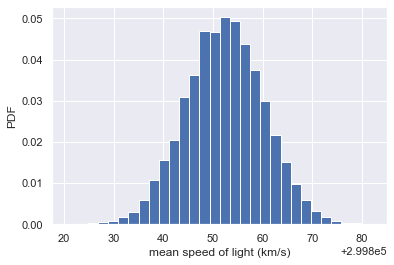

In [176]:
_ = plt.hist(bs_replicates, bins=30, density=True) 
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')
plt.show()

### Confidence interval of a statistic

- If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval.

### Bootstrap confidence interval

In [178]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([299837.1, 299867.6])

### Exercise

#### Generating many bootstrap replicates

Now you'll write another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

In [179]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#### Bootstrap replicates of the mean and the SEM   


In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the **standard error of the mean**, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, `sem = np.std(data) / np.sqrt(len(data))`. Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

10.510549150506188
10.597594518000601


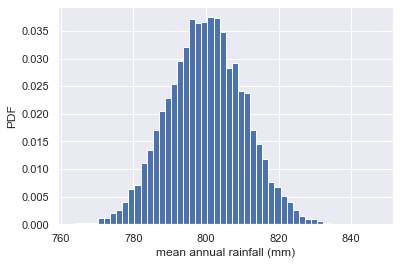

In [182]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall,  np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# Notice that the SEM we got from the known expression and 
# the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

#### Confidence intervals of rainfall data   

A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the `np.percentile()` function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as `bs_replicates`. What is the 95% confidence interval?

In [183]:
np.percentile(bs_replicates,  [2.5, 97.5])

array([779.58885338, 820.83840226])

#### Bootstrap replicates of other statistics   


We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

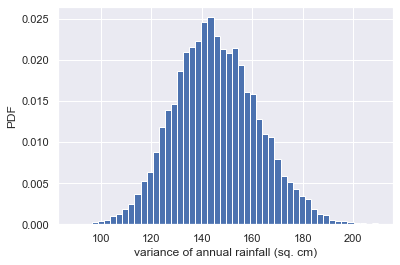

In [186]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates =  draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, density=True, bins = 50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show() # This is not normally distributed, as it has a longer tail to the right.

#### Confidence interval on the rate of no-hitters
Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter τ. Plot a histogram of your replicates and report a 95% confidence interval.

95% confidence interval = [661.55348606 871.81503984] games


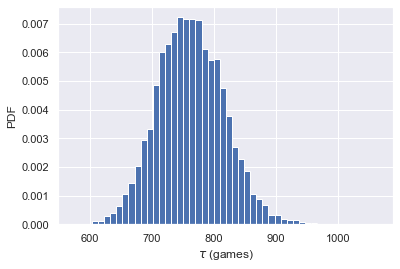

In [188]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show() # This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

## Pairs bootstrap

### Nonparametric inference

- Make no assumptions about the model or probability distribution underlying the data

### Pairs bootstrap for linear regression

- Resample data in pairs
- Compute slope and intercept from resampled data
- Each slope and intercept is a bootstrap replicate
- Compute confidence intervals from percentiles of bootstrap replicates

### Generating a pairs bootstrap sample

In [200]:
total_votes = df_swing["total_votes"]
dem_votes = df_swing["dem_votes"]
dem_share = df_swing["dem_share"]

In [201]:
inds = np.arange(len(total_votes))
bs_inds = np.random.choice(inds, len(inds))
bs_total_votes = total_votes[bs_inds] 
bs_dem_share = dem_share[bs_inds]

### Computing a pairs bootstrap replicate

In [203]:
bs_slope, bs_intercept = np.polyfit(bs_total_votes, bs_dem_share, 1)
bs_slope, bs_intercept

(3.734597493543244e-05, 40.687460760049774)

In [204]:
np.polyfit(total_votes, dem_share, 1) # fit of original

array([4.0370717e-05, 4.0113912e+01])

### Exercise

#### A function to do pairs bootstrap

Each collection of pairs fit with a line, in this case using `np.polyfit()`. We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of `x,y` data.

In [208]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps =  np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

#### Pairs bootstrap of literacy/fertility data

Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays `illiteracy` and `fertility`.

[0.04459586 0.05542256]


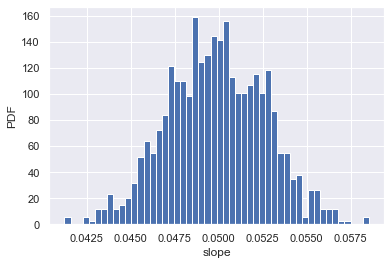

In [210]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

#### Plotting bootstrap regressions

A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as `bs_slope_reps` and `bs_intercept_reps`).

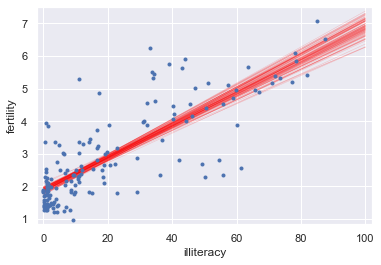

In [211]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i], # y = a*x + b
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Introduction to hypothesis testing

## Formulating and simulating a hypothesis


### Hypothesis testing

- Assessment of how reasonable the observed data are assuming a hypothesis is true

### Null hypothesis

- Another name for the hypothesis you are testing

### Permutation

- Random reordering of entries in an array

### Generating a permutation sample

In [219]:
dem_share_PA = df_swing[df_swing["state"]=="PA"]["dem_share"]
dem_share_OH = df_swing[df_swing["state"]=="OH"]["dem_share"]

In [220]:
import numpy as np 
# make a single array with all of the county in it
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH)) 
# permute the entry of the array
dem_share_perm = np.random.permutation(dem_share_both)
# assign the first 67 to be labeled as PA and last 88 to be labeled as OH
perm_sample_PA = dem_share_perm[:len(dem_share_PA)] 
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

### Exercise

#### Generating a permutation sample

In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively `n1` and `n2` entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first `n1` entries as the permutation sample of the first array and the last `n2` entries as the permutation sample of the second array.

In [222]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)] 
    perm_sample_2 = permuted_data[len(data1):] 

    return perm_sample_1, perm_sample_2

#### Visualizing permutation sampling

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

In [224]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

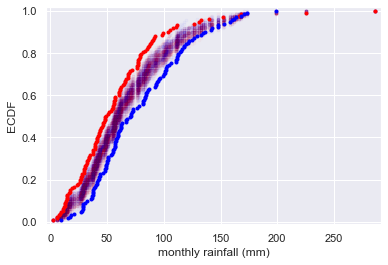

In [225]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

# Notice that the permutation samples ECDFs overlap and give a purple haze. 
# None of the ECDFs from the permutation samples overlap with the observed data, 
# suggesting that the hypothesis is not commensurate with the data. 
# June and November rainfall are not identically distributed.

## Test statistics and p-values


### Hypothesis testing

- Assessment of how reasonable the observed data are assuming a hypothesis is true

### Test statistic

- A single number that can be computed from observed data and from data you simulate under the null hypothesis
- It serves as a basis of comparison between the two

### Permutation replicate

In [228]:
np.mean(perm_sample_PA) - np.mean(perm_sample_OH)

-0.9393639755766614

In [229]:
np.mean(dem_share_PA) - np.mean(dem_share_OH) # orig. data

1.1582360922659518

### p-value

- The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true

- **NOT** the probability that the null hypothesis is true

### Statistical significance

- Determined by the smallness of a p-value

### Null hypothesis significance testing (NHST)

- Another name for what we are doing in this chapter

### Exercise

#### Generating permutation replicates

As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the `draw_bs_reps()` function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, `draw_perm_reps()`, to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature `draw_perm_reps(data_1, data_2, func, size=1)`. Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

In [230]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

#### Look before you leap: EDA before hypothesis testing

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, `d`f, where column `ID` is the identity of the frog and column `impact_force` is the impact force in Newtons (N).

In [232]:
df = pd.read_csv("data/frog_tongue.csv")

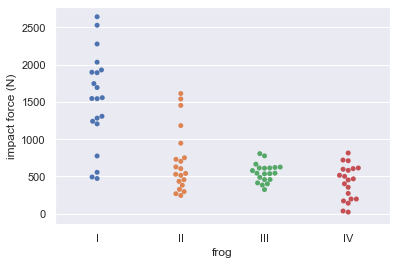

In [236]:
# Make bee swarm plot
_ = sns.swarmplot(x="ID", y="impact force (mN)", data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

# Eyeballing it, it does not look like they come from the same distribution. 
# Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, 
# has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult 
# to tell if they have difference distributions, so we should proceed with the hypothesis test.

#### Permutation test on frog data

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays `force_a` and `force_b`.

In [268]:
force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])

force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

In [269]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

# The p-value tells you that there is about a 0.6% chance that you would get the 
# difference of means observed in the experiment if frogs were exactly the same. 
# A p-value below 0.01 is typically said to be "statistically significant," 
# but: warning! warning! warning! You have computed a p-value; it is a number. 
# I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 
# are both said to be "statistically significant," but they are definitely not the same!

p-value = 0.0057


## Bootstrap hypothesis tests


### Pipeline for hypothesis testing

- Clearly state the null hypothesis

- Define your test statistic

- Generate many sets of simulated data assuming the null hypothesis is true

- Compute the test statistic for each simulated data set

- The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data

### Michelson and Newcomb: speed of light pioneers

- Michelson: 299,552 km/s
- Newcomb: 299,860 km/s

### The data we have

- Michelson: whole dataset
- Newcomb: only mean = 299,860 km/s

### Null hypothesis

- The true mean speed of light in Michelson’s experiments was actually Newcomb's reported value

### Shifting the Michelson data

In [253]:
newcomb_value = 299860 # km/s 
michelson_shifted = michelson_speed_of_light - np.mean(michelson_speed_of_light) + newcomb_value

### Calculating the test statistic

In [254]:
def diff_from_newcomb(data, newcomb_value=299860): 
    return np.mean(data) - newcomb_value

diff_obs = diff_from_newcomb(michelson_speed_of_light) 
diff_obs

-7.599999999976717

### Computing the p-value

In [256]:
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)
p_value = np.sum(bs_replicates <= diff_obs) / 10000 
p_value 

0.1624

### One sample test

- Compare one set of data to a single number

### Two sample test

- Compare two sets of data

### Exercise

#### A one-sample bootstrap hypothesis test

Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of **0.55 N**. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: *The mean strike force of Frog B is equal to that of Frog C*.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B *if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true*. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [262]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

# The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

p =  0.0047


#### A two-sample bootstrap hypothesis test for difference of means

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [270]:
forces_concat = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468])
empirical_diff_means = 0.28825000000000006

In [271]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted data sets for both force_a and force_b such that the mean of each is the mean of the concatenated array of impact forces.
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted ,np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates>=empirical_diff_means) / 10000
print('p-value =', p)

#  You got a similar result as when you did the permutation test. 
# Nonetheless, remember that it is important to carefully think about what question you want to ask. 
# Are you only interested in the mean impact force, or in the distribution of impact forces?

p-value = 0.0043


# Hypothesis test examples